# 의사 결정 나무
- 분류, 회귀 분석에 모두 사용할 수 있는 알고리즘
- 의사결정나무의 분류법
1. 여러가지 독립변수 중에서 하나의 독립변수를 고르고, 그것의 기준값을 정함
2. 1번에서 고른 기준을 통해 기준보다 작은지 큰지를 나눔(2개의 그룹으로 나눔)
3. 1번과 2번을 반복해서 하위의 자식 노드를 만들어서 분류, 자식 노드에 한가지 클래스의 데이터만 있으면 그때 종료

- 이러한 과정이 노드가 증가하는 Tree와 같은 형태와 유사하여 의사 결정 나무라고 불림
- 1번 과정에서 독립변수를 고르는 기준은 정보 획득량, 또는 엔트로피가 얼마나 감소하였는지를 기준으로 함

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [42]:
data = load_iris()
y = data.target
X = data.data[:, 2:]
feature_names = data.feature_names[2:]

model = DecisionTreeClassifier(criterion= 'entropy', random_state=0, max_depth= 5).fit(X,y)

In [43]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz
import numpy as np
import matplotlib.pyplot as plt

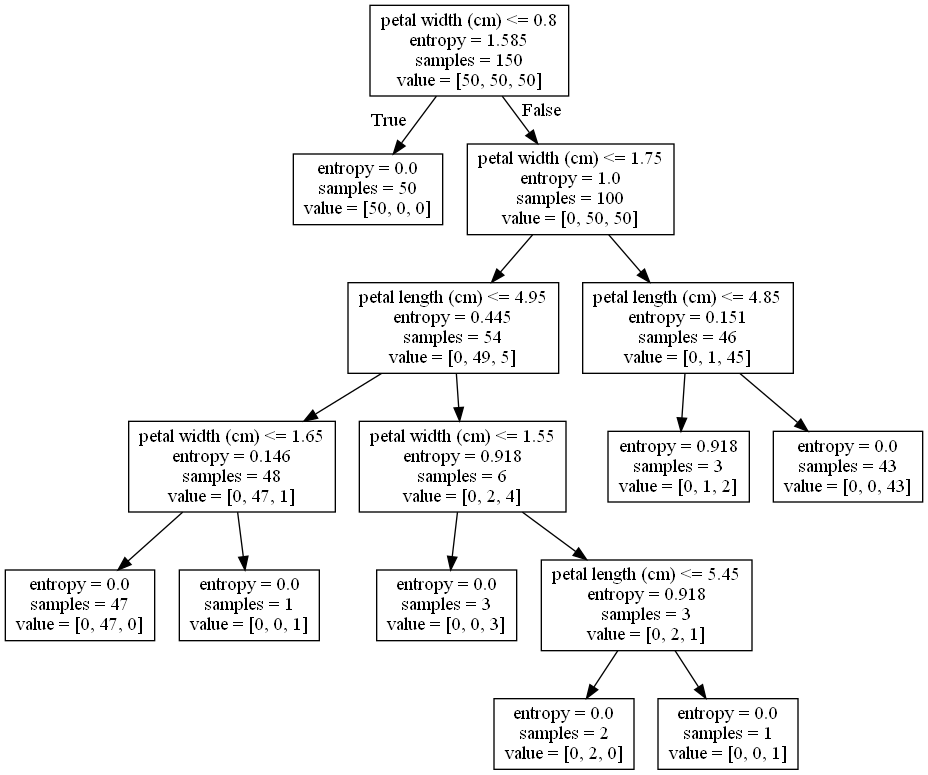

In [44]:
def draw_tree(model):
    dot = io.StringIO()
    export_graphviz(model, out_file=dot, feature_names= feature_names) # 그래프를 그릴 때 독립변수명, 뭘 기준으로 그릴건지
    graph = pydot.graph_from_dot_data(dot.getvalue())[0]
    image = graph.create_png()
    return Image(image)

draw_tree(model)

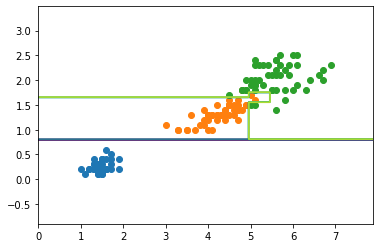

In [41]:
def plot_tree(X,y,model):
    for  i, j in enumerate(np.unique(y)):
        plt.scatter(x = X[y==j,0], y = X[y==j,1])
    #분할하는 선 그리기 
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                         np.arange(x2_min, x2_max, 0.01))    
    #모델 예측 관련해서 선을 수정
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1,xx2, Z)
    
    return Z    
        
plot_tree(X,y,model)
plt.show()

# Random Forest
- 나무가 많이 모이면 숲이 된다
- Decision Tree를 여러개 생성해서, 그 중에서 최고의 나무를 찾고자 하는 알고리즘

In [47]:
from sklearn.ensemble import RandomForestClassifier # 모델에 해당하는 알고리즘 
from sklearn.datasets import make_moons # 데이터셋
from sklearn.model_selection import train_test_split # 분석을 돕는 추가 방법
import matplotlib.pyplot as plt
import mglearn

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [52]:
X, y = make_moons(n_samples=200, noise= 0.2, random_state= 3)

#데이터를 나누기
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

#알고리즘을 불러오기
forest = RandomForestClassifier(n_estimators=5, random_state= 0)
#학습 시키기
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

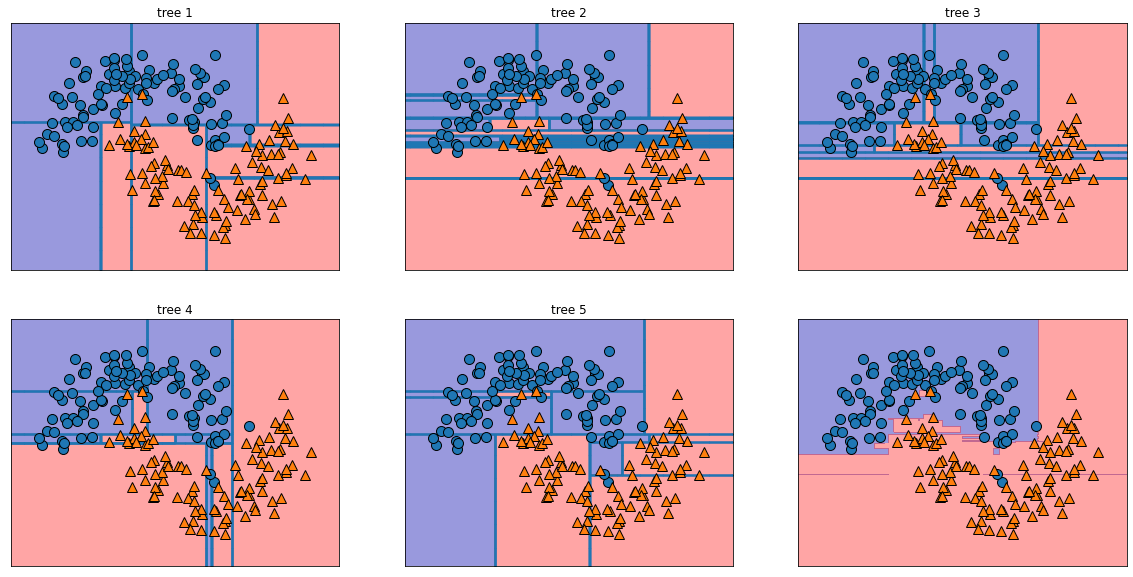

In [65]:
#시각화
fig,axex = plt.subplots(2,3, figsize = (20,10))

#estimator의 갯수만큼 시각화
for i, (ax,tree) in enumerate(zip(axex.ravel(), forest.estimators_)):
    ax.set_title('tree {}'.format(i+1))
    mglearn.plots.plot_tree_partition(X,y,tree, ax = ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill = True, alpha = .4)
mglearn.discrete_scatter(X[:,0], X[:,1],y)

In [76]:
#유방암 데이터
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

#데이터를 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

#알고리즘을 불러오기
#의사 결정 나무와 랜덤포레스트가 어떤 독립변수가 더 중요하게 여겼는지를 알아보기

model = input()
if model == 'tree': 
    model = DecisionTreeClassifier()
elif model == 'forest':
    model = RandomForestClassifier(n_estimators=5,random_state= 0)
#학습 시키기
model.fit(X_train, y_train)

#학습 데이터의 정확도
print(model.score(X_train,y_train))
#테스트 데이터의 정확도
print(model.score(X_test,y_test))

forest
0.9953051643192489
0.9440559440559441


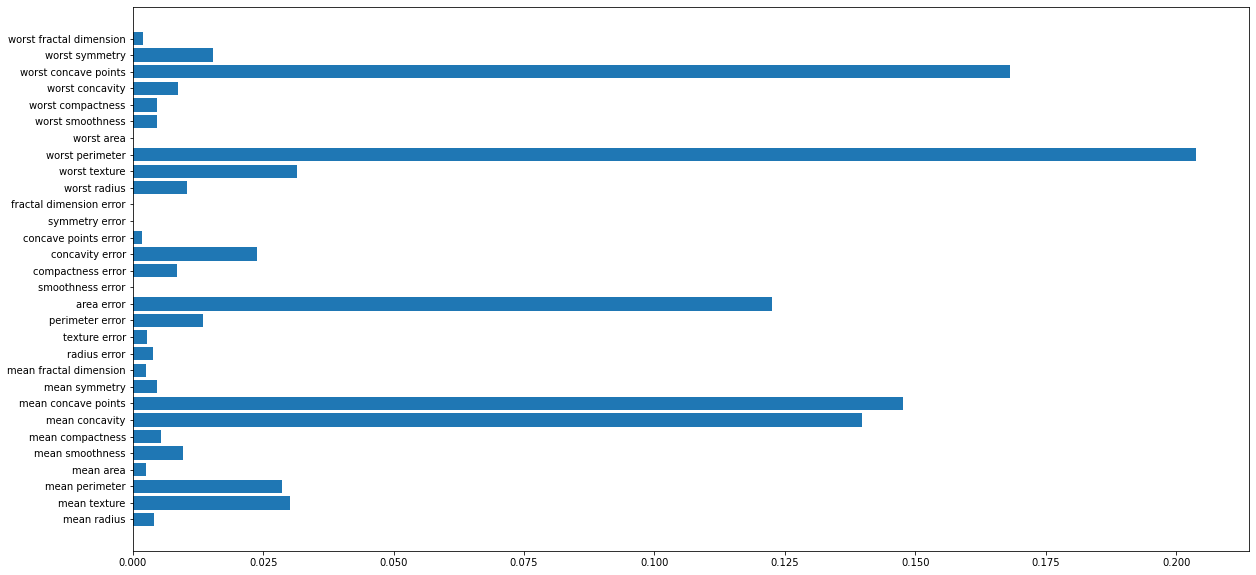

In [77]:
#칼럼별 중요도를 그리는 함수
def important_feature(model):
    plt.figure(figsize=(20,10))
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features), cancer.feature_names)
    
important_feature(model)